{'NumDisparities': 128, 'BlockSize': 5, 'UniquenessRatio': 5, 'TextureThreshold': 210, 'PreFilterCap': 63, 'PreFilterSize': 55, 'PreFilterType': 1, 'Radius': 1, 'Threshold': 5}


C:\Users\divya\AppData\Local\Temp\ipykernel_41104\887752065.py:40: RuntimeWarning: divide by zero encountered in divide
  depth = f * T / disparity*units


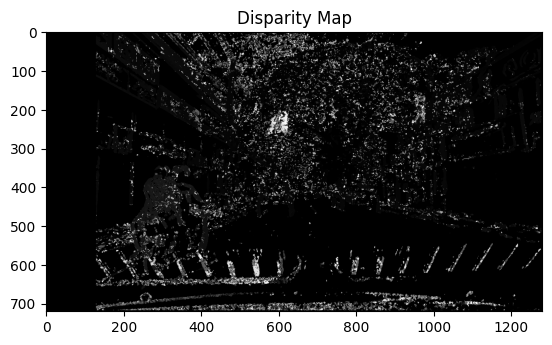

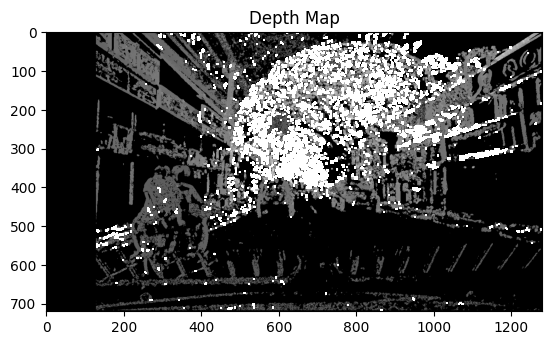

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import json

# Load left and right images
imL = cv2.imread('stereo_dataset/left_sample/7.png', cv2.IMREAD_GRAYSCALE)
imR = cv2.imread('stereo_dataset/right_sample/7.png', cv2.IMREAD_GRAYSCALE)


with open("parameters.json","r") as p:
     parameters = json.load(p)
print(parameters)

stereo = cv2.StereoBM_create()
stereo = cv2.StereoBM_create()
stereo.setNumDisparities(parameters['NumDisparities'])
stereo.setBlockSize(parameters['BlockSize'])
stereo.setUniquenessRatio(parameters['UniquenessRatio'])
stereo.setTextureThreshold(parameters['TextureThreshold'])
stereo.setPreFilterCap(parameters['PreFilterCap'])
stereo.setPreFilterSize(parameters['PreFilterSize'])
stereo.setPreFilterType(parameters['PreFilterType'])

# to generate a json file with current values
#with open("parameters.json","w") as p:
 #   json.dump(parameters,p)

# Compute disparity map
disparity = stereo.compute(imL, imR)

# Normalize disparity map
disparity = (disparity/16.0 - 0) / stereo.getNumDisparities()

# Convert disparity map to depth units
f = 645  # focal length in pixels
T = 0.055  # baseline in meters
units= 0.001
depth = f * T / disparity*units

plt.imshow(disparity, cmap='gray')
plt.title('Disparity Map')
plt.show()
# Plot depth map
plt.imshow(depth, cmap='gray')
plt.title('Depth Map')
plt.show()



# Create StereoBM object and set parameters



In [2]:
def make_point_cloud(imL, imR, f_pixel=645, baseline=0.055):
    # Compute disparity map
    disparity = stereo.compute(imL, imR)

    # Normalize disparity map
    disparity = (disparity/16.0 - 0) / stereo.getNumDisparities()

    # Convert disparity map to depth units
    f = 645  # focal length in pixels
    T = 0.044  # baseline in meters
    units= 0.0001
    depth = f * T / disparity*units
    
    #norm_depth = cv2.normalize(depth, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    #norm_depth = norm_depth.astype(np.uint8)
    
    return depth, disparity
    

In [3]:
def image_denoise(image):
   
   r = parameters['Radius']
   t = parameters['Threshold']
   
   for i in range(image.shape[0]):
      for j in range(image.shape[1]):
         
         if(math.isinf(image[i][j])):
            temp =0
            for y in range(-r,r):
               for x in range(-r,r):
                  if(not(i==0 and j==0)):
                     temp = temp+image[i+y][j+x]
            
            image[i][j] = 0
            
         else:
            temp =0
            for y in range(-r,r):
               for x in range(-r,r):
                  if(not(i==0 and j==0)):
                     temp = temp+image[i+y][j+x]

            if((image[i][j] - temp/8 >t) or (temp/8-image[i][j]>t)):
               image[i][j] = temp/8
  
   return image


C:\Users\divya\AppData\Local\Temp\ipykernel_41104\2948489780.py:12: RuntimeWarning: divide by zero encountered in divide
  depth = f * T / disparity*units


1


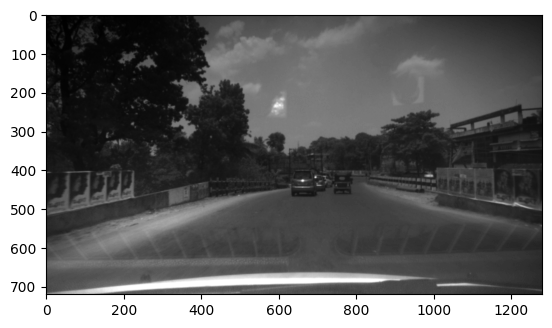

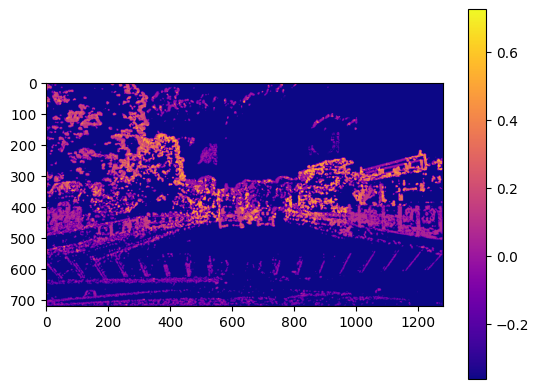

2


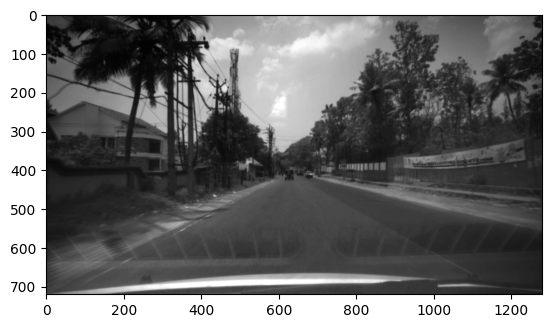

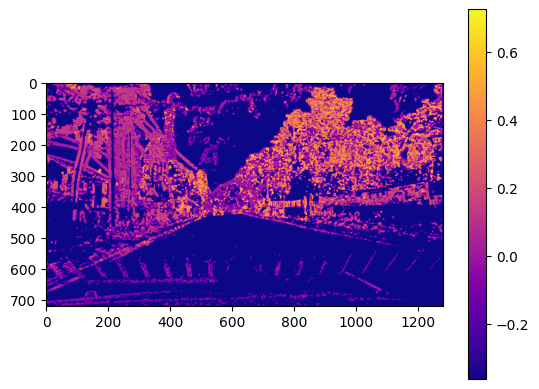

3


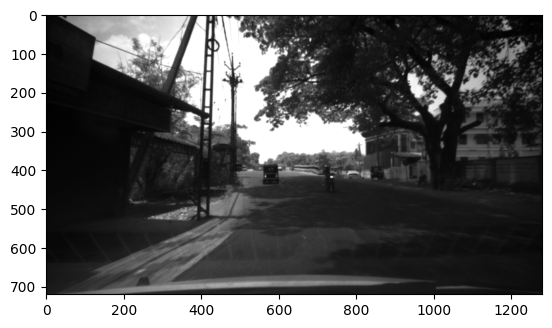

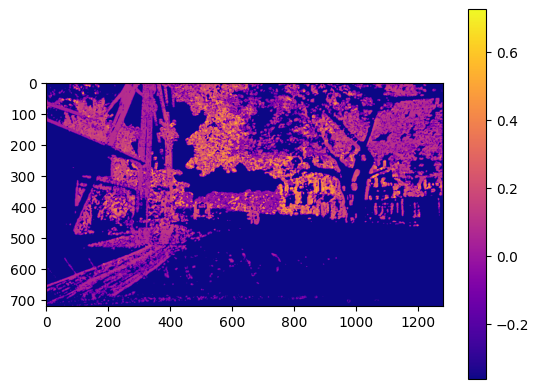

4


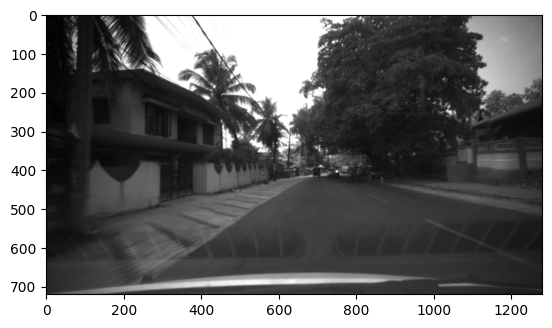

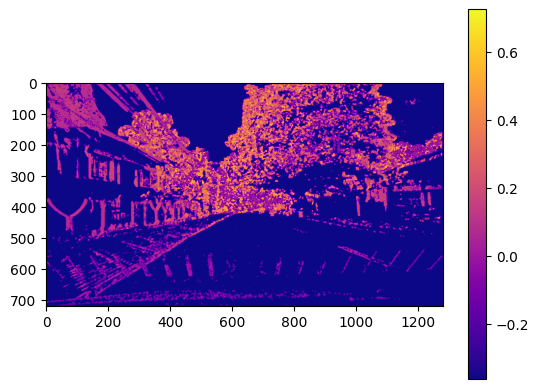

5


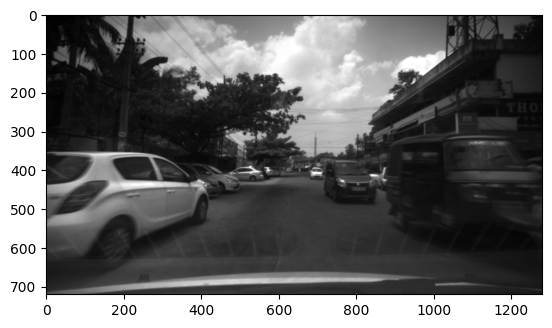

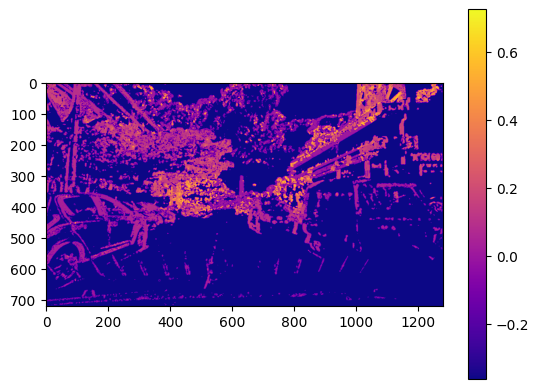

6


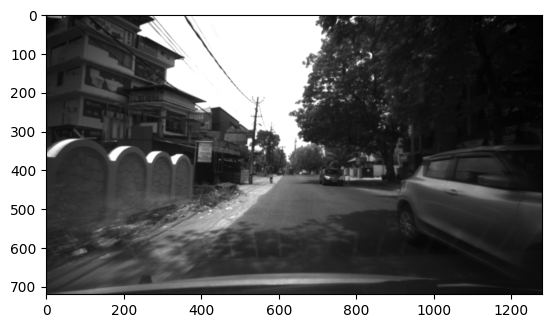

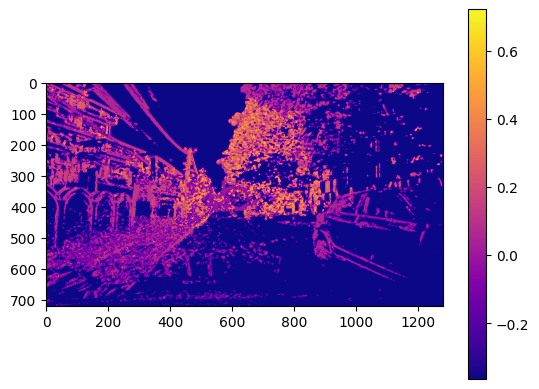

7


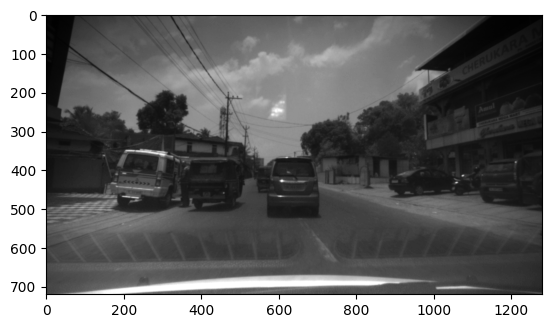

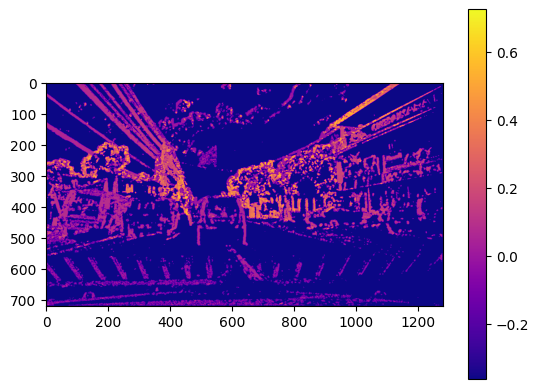

8


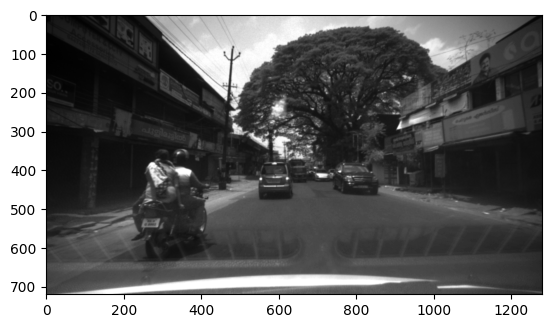

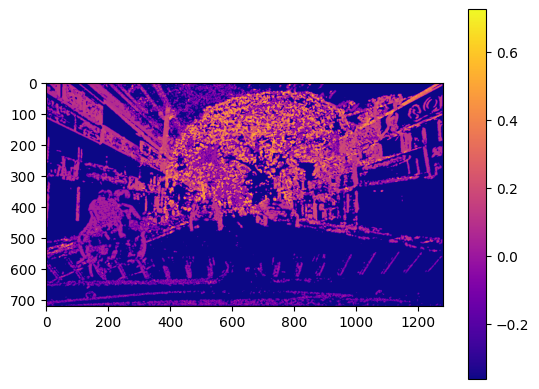

9


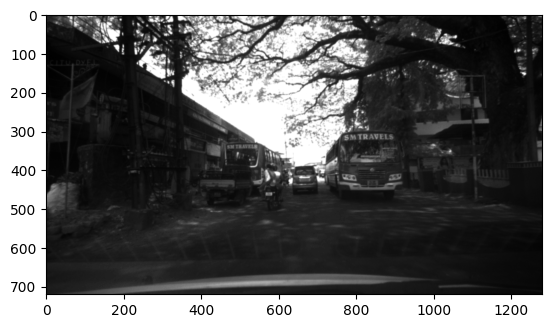

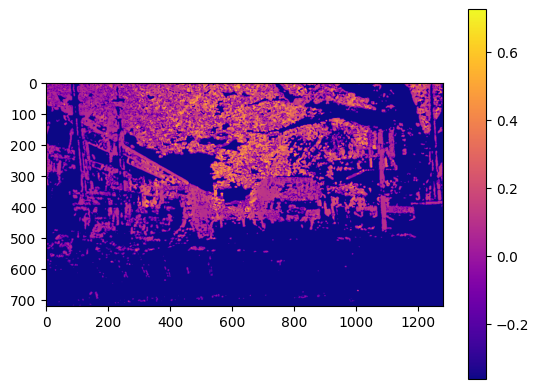

10


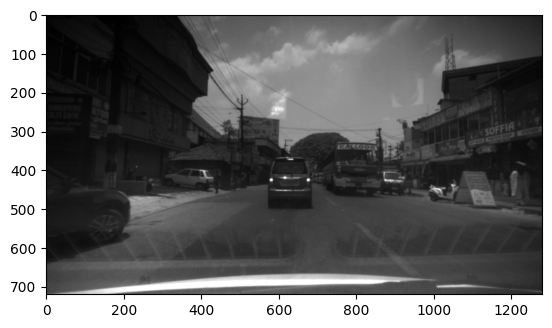

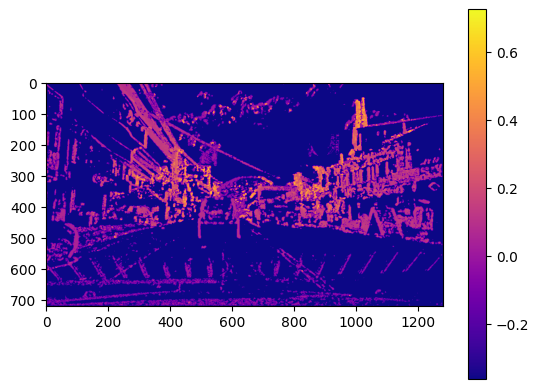

11


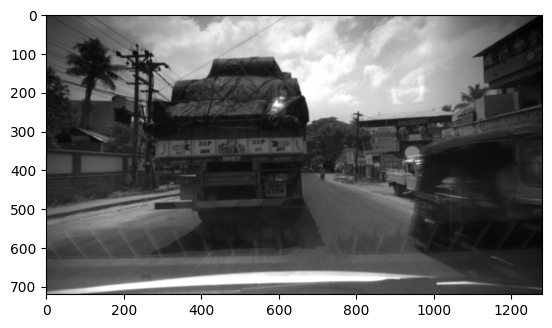

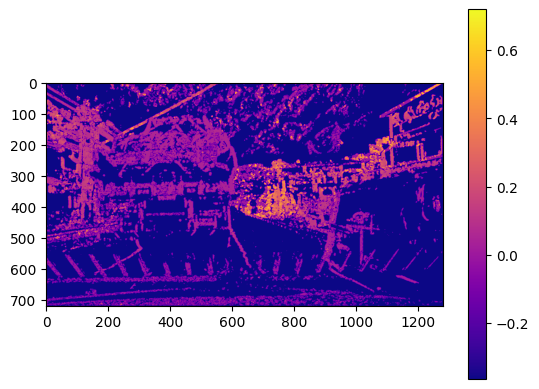

12


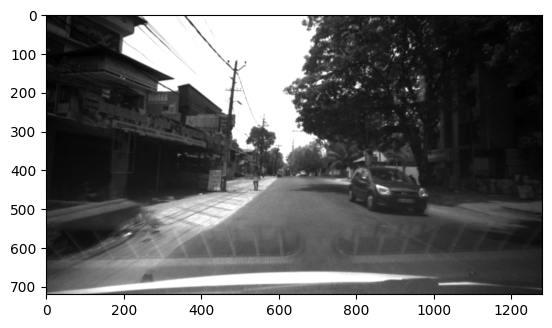

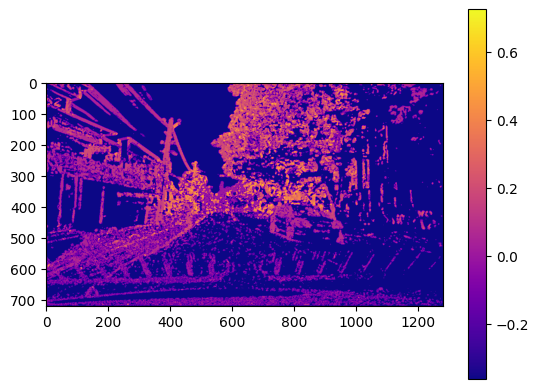

13


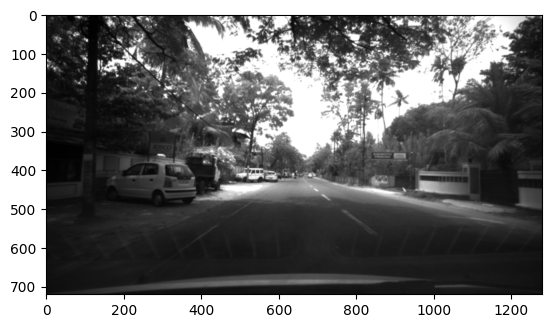

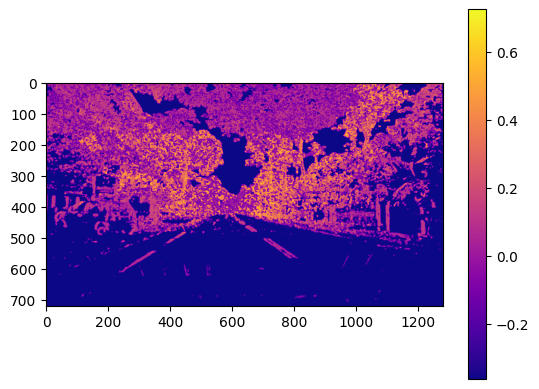

14


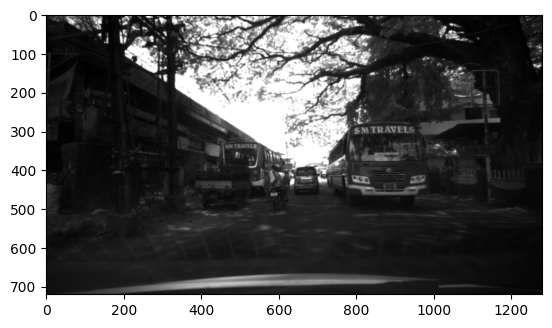

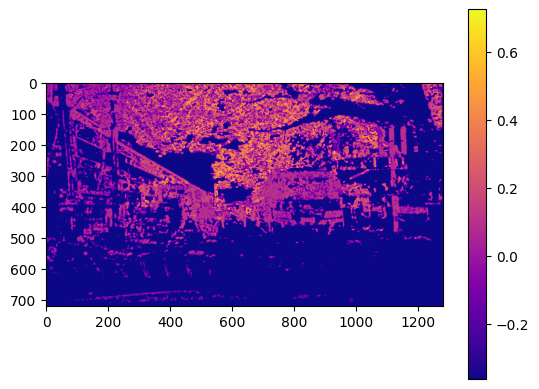

15


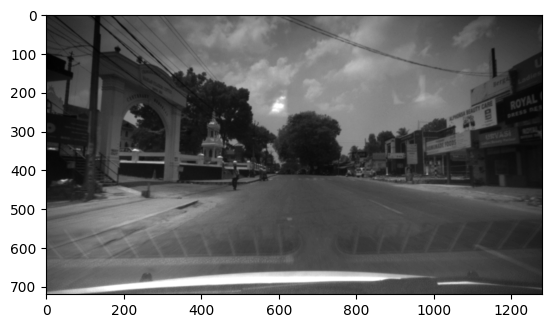

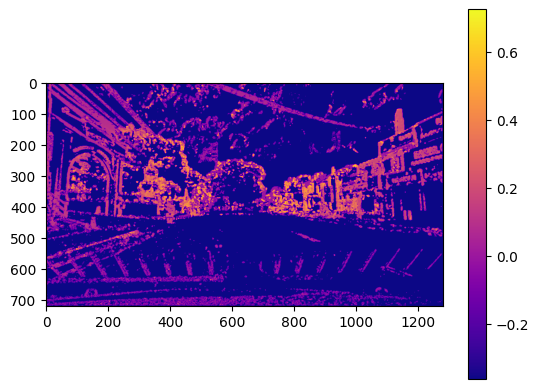

16


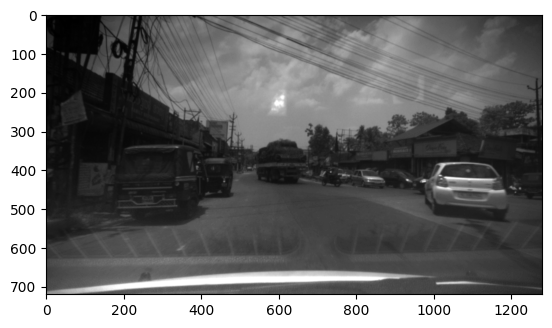

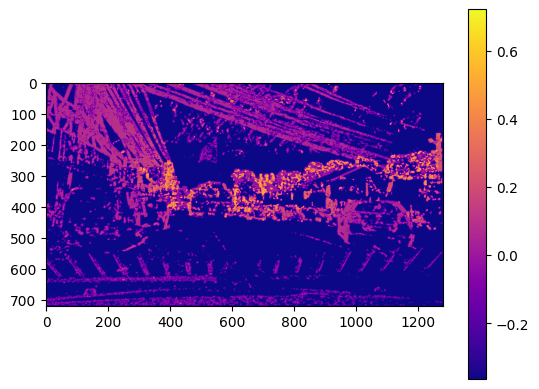

17


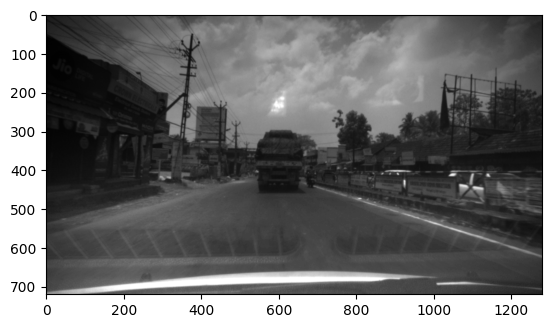

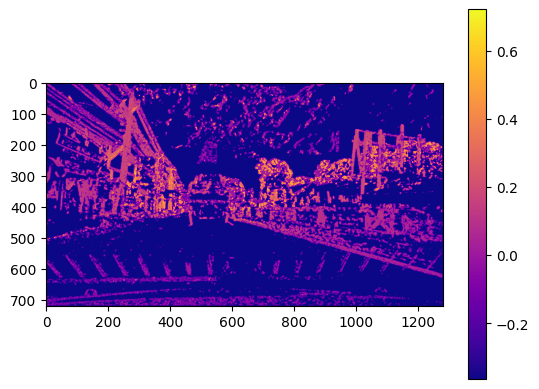

18


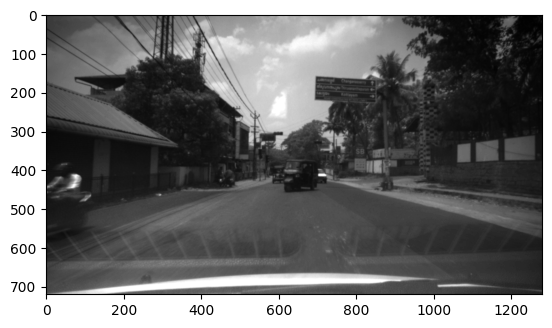

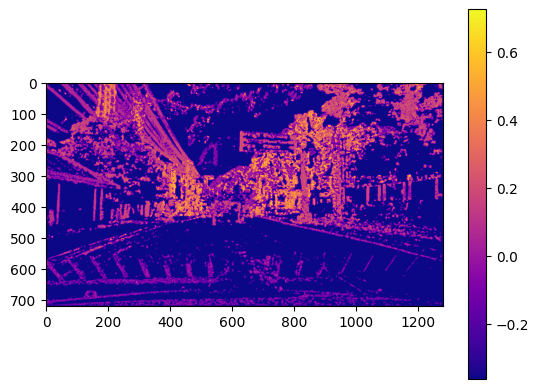

19


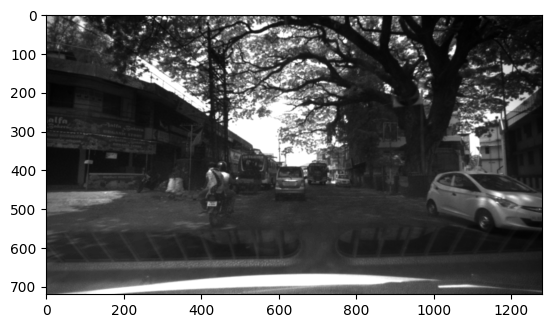

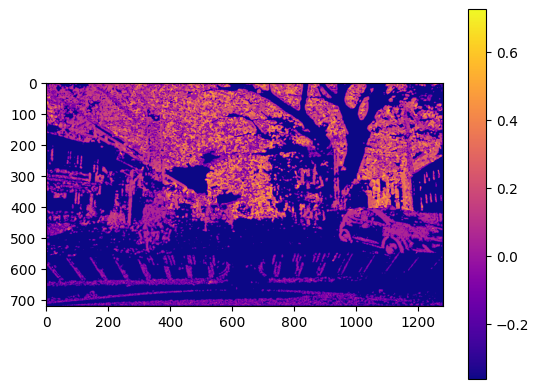

20


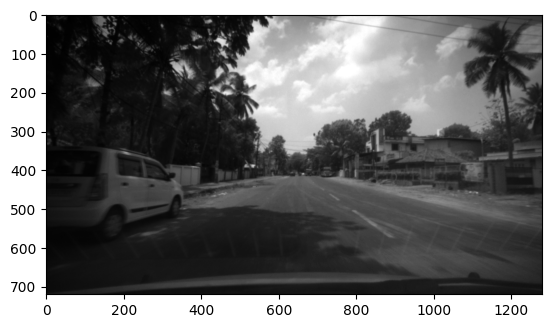

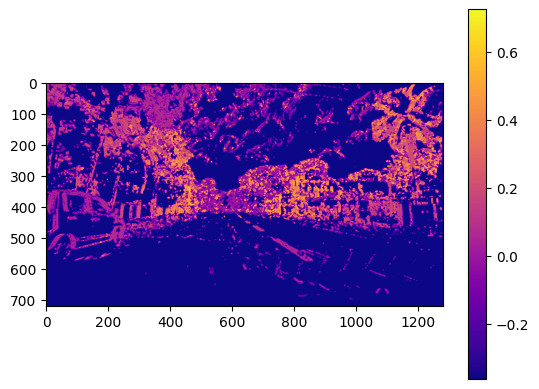

In [4]:
for i in range(20):
    imL_path, imR_path = f"stereo_dataset/left_sample/{i}.png", f"stereo_dataset/right_sample/{i}.png"
    imL = cv2.imread(imL_path, cv2.IMREAD_GRAYSCALE)
    imR = cv2.imread(imR_path, cv2.IMREAD_GRAYSCALE)
    
    imDepth, imDisparity = make_point_cloud(imL, imR)

    #plt.imshow(imDepth, cmap='plasma')
    #plt.show()
    
    imDepth = image_denoise(imDepth)

    imDepth = imDepth[:,parameters['NumDisparities']:]

    imDepth = cv2.resize(imDepth,(1280,720))
    
    print(i+1)
    plt.imshow(imL, cmap='gray')
    plt.show()
    a = plt.imshow(imDepth, cmap='plasma')
    plt.colorbar(a)
    plt.show()
  
    #print(np.ptp(imDepth,axis =1))
